In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
mortgages = '/content/drive/MyDrive/Coding Dojo/Raw Data/mortgages.csv'
mortgage_df = pd.read_csv(mortgages)
mortgage_df.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03


In [ ]:
mortgage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Month             1080 non-null   int64  
 1   Starting Balance  1080 non-null   float64
 2   Repayment         1080 non-null   float64
 3   Interest Paid     1080 non-null   float64
 4   Principal Paid    1080 non-null   float64
 5   New Balance       1080 non-null   float64
 6   Mortgage Name     1080 non-null   object 
 7   Interest Rate     1080 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 67.6+ KB


In [ ]:
# Create a filter so the Mortgage Name is '30 year'. 
# Use len() to find how many rows correspond to 30 years.
length_filter = mortgage_df['Mortgage Name'] == '30 Year'
len(mortgage_df[length_filter])

720

In [ ]:
# Create a filter for an interest rate of 3%
three_percent = mortgage_df['Interest Rate'] == 0.03
mortgage_df[three_percent].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540 entries, 0 to 899
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Month             540 non-null    int64  
 1   Starting Balance  540 non-null    float64
 2   Repayment         540 non-null    float64
 3   Interest Paid     540 non-null    float64
 4   Principal Paid    540 non-null    float64
 5   New Balance       540 non-null    float64
 6   Mortgage Name     540 non-null    object 
 7   Interest Rate     540 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 38.0+ KB


In [ ]:
# Define new dataframe based on both the year and interest filters you have created
three_df = mortgage_df[length_filter & three_percent]
three_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 359
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Month             360 non-null    int64  
 1   Starting Balance  360 non-null    float64
 2   Repayment         360 non-null    float64
 3   Interest Paid     360 non-null    float64
 4   Principal Paid    360 non-null    float64
 5   New Balance       360 non-null    float64
 6   Mortgage Name     360 non-null    object 
 7   Interest Rate     360 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 25.3+ KB


In [ ]:
# Create new filter for interest rate == 5%
# Also created new df based on length_filter and 5% interest
five_percent = mortgage_df['Interest Rate'] == 0.05
five_df = mortgage_df[length_filter & five_percent]
five_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 360 to 719
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Month             360 non-null    int64  
 1   Starting Balance  360 non-null    float64
 2   Repayment         360 non-null    float64
 3   Interest Paid     360 non-null    float64
 4   Principal Paid    360 non-null    float64
 5   New Balance       360 non-null    float64
 6   Mortgage Name     360 non-null    object 
 7   Interest Rate     360 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 25.3+ KB


In [ ]:
# What are the first 3 values in the output for cumsum of the 3% rate?
three_df['Interest Paid'].cumsum().head(3)

0    1000.00
1    1998.28
2    2994.84
Name: Interest Paid, dtype: float64

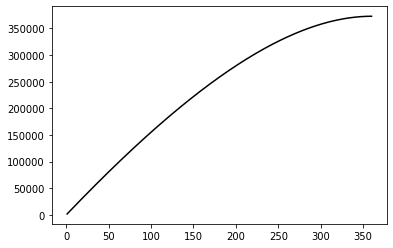

In [ ]:
# Use plt.plot(x, y, c=color) to plot the black line 5%
x = five_df['Month']
y = five_df['Interest Paid'].cumsum()
plt.plot(x, y, c = 'k');

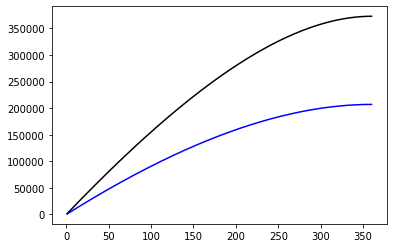

In [ ]:
# to get both lines on same graph, put 2 plt.plot() functions one ater the other
# in the same code block
plt.plot( five_df['Month'], five_df['Interest Paid'].cumsum(), c = 'k')
plt.plot( three_df['Month'], three_df['Interest Paid'].cumsum(), c = 'b');

Above is part 1

Now we build on that for part 2

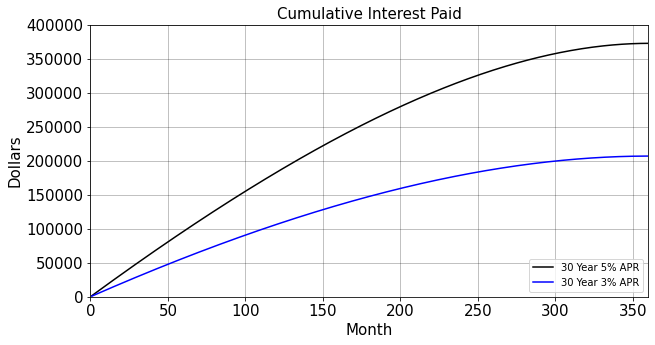

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(five_df['Month'], five_df['Interest Paid'].cumsum(), c = 'k', label = '30 Year 5% APR')
plt.plot(three_df['Month'], three_df['Interest Paid'].cumsum(), c = 'b', label = '30 Year 3% APR')
plt.grid(c = 'k', alpha = .3)
plt.legend(loc = 'lower right')
plt.ylim(bottom = 0, top = 400000)
plt.xlim(left = 0, right = 360)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Dollars', fontsize = 15)
plt.title('Cumulative Interest Paid', fontsize = 15)
plt.show()
